# Introducción a NLP con NLTK

## Accesando Copora

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


SystemExit: 0

/Users/jpdebotton/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Proyecto Gutenberg 

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Escojamos el primero de estos textos 'Emma' de Jane Austen y veamos cuantas palabras contiene

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [5]:
len(emma)

192427

Cuando definimos emma llamamos el método 'words' del objeto 'gutenberg' incluido en el paquete 'corpus' de nltk. Para evitarnos escribir tanto cada vez que debamos utilizar un método podemos importar de la siguiente manera:

In [6]:
from nltk.corpus import gutenberg

In [7]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

Ahora hagamos un pequeño programa para ver algunas estadísticas de cada uno de los textos incluidos en gutenberg

In [8]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # ¿Qué estoy haciendo en esta línea?
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


Este programa nos calcula tres estadísticas para cada texto: 
<ol>
<li> Largo Promedio de la Palabra (Average Word Length) </li>
<li> Largo Promedio de la Oración (Average Sentence Length) </li>
<li> Número de veces que una palabra del vocabulario aparece en promedio (Lexical diversity score)</li>
</ol>

Aquí podemos observar que el largo promedio de las palabras tiende a estar entre 3 y 4 letras en el Inglés (num_chars incluye espacios), mientras que en contraste el Average Sentence Length y Lexical Diversity Score si dependen del autor

Vimos en el ejemplo anterior que .raw() nos da el texto sin procesamiento de lenguaje, mientras que .sents() nos divide el texto en oraciones donde cada oración es una lista de palabras

In [9]:
macbeth_sentences = gutenberg.sents("shakespeare-macbeth.txt")
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [10]:
print(macbeth_sentences[1179])

['Be', 'Lyon', 'metled', ',', 'proud', ',', 'and', 'take', 'no', 'care', ':', 'Who', 'chafes', ',', 'who', 'frets', ',', 'or', 'where', 'Conspirers', 'are', ':', 'Macbeth', 'shall', 'neuer', 'vanquish', "'", 'd', 'be', ',', 'vntill', 'Great', 'Byrnam', 'Wood', ',', 'to', 'high', 'Dunsmane', 'Hill', 'Shall', 'come', 'against', 'him', '.']


In [11]:
longest_len = max(len(s) for s in macbeth_sentences)
longest_len

158

¿Pero ahora cómo seleccionamos esa oración?

In [12]:
print([s for s in macbeth_sentences if len(s) == longest_len])

[['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well', 'hee', 'deserues', 'that', 'Name', ')', 'Disdayning', 'Fortune', ',', 'with', 'his', 'brandisht', 'Steele', ',', 'Which', 'smoak', "'", 'd', 'with', 'bloody', 'execution', '(', 'Like', 'Valours', 'Minion', ')', 'caru', "'", 'd', 'out', 'his', 'passage', ',', 'Till', 'hee', 'fac', "'", 'd', 'the', 'Slaue', ':', 'Which', 'neu', "'", 'r', 's

### Web y Chat 

Una cosa distinta es revisar materiales de la literatura establecida hace muchos años y otra diferente es analizar lenguaje menos formal.

In [13]:
from nltk.corpus import webtext

In [14]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65])

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb


Asimismo, podemos ver un poco de los chats de un sitio web anonimizados en un chatroom específico de acuerdo a la edad (teens, 20s, 30s, 40s, plus generic adults charoom). Por ejemplo, el archivo 10-19-20s_706posts.xml contiene 706 posts de un chatroom de 20s el 19 de noviembre de 2006.

In [15]:
from nltk.corpus import nps_chat

In [16]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123])

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']


### Brown Corpus

Contiene muchísimos documentos desde noticias, editoriales, ficción, humor, etcétera

Podemos accesar no sólo por fileids sino también por categoría de la siguiente manera 

In [17]:
from nltk.corpus import brown

In [18]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [19]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [20]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [21]:
brown.sents(categories=['news','editorial','reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

#### Ejercicio selecciona las oraciones de las categorías 'government', 'news' y 'religion' y cuenta el total que hay en cada una

In [22]:
[len(brown.sents(categories=c)) for c in ['government','news','religion']]

[3032, 4623, 1716]

Brown corpus es un buen recurso para estudiar las diferencias sistemáticas entre distintos géneros de textos que en linguística se conoce como estilística (stylistics)

Podemos estudiar la presencia de algunos verbos modales para varios géneros

In [23]:
news_text = brown.words(categories='news')

In [24]:
nltk.FreqDist?

In [25]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
fdist

FreqDist({'the': 6386,
          'fulton': 14,
          'county': 61,
          'grand': 19,
          'jury': 46,
          'said': 406,
          'friday': 41,
          'an': 311,
          'investigation': 11,
          'of': 2861,
          "atlanta's": 4,
          'recent': 20,
          'primary': 17,
          'election': 41,
          'produced': 6,
          '``': 732,
          'no': 120,
          'evidence': 17,
          "''": 702,
          'that': 829,
          'any': 94,
          'irregularities': 3,
          'took': 47,
          'place': 33,
          '.': 4030,
          'further': 18,
          'in': 2020,
          'term-end': 1,
          'presentments': 1,
          'city': 93,
          'executive': 18,
          'committee': 75,
          ',': 5188,
          'which': 245,
          'had': 281,
          'over-all': 2,
          'charge': 18,
          'deserves': 3,
          'praise': 2,
          'and': 2186,
          'thanks': 6,
          'atlanta':

In [26]:
modals = ['can','could','may','might','must','will']

In [27]:
fdist['can']

94

In [28]:
for m in modals:
    print(m + ':', fdist[m], end= " ")

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

Ahora si queremos hacer esta cuenta para varios generos de interés debemos usar la función ConditionalFreqDist 

In [29]:
nltk.ConditionalFreqDist?

In [30]:
cfd = nltk.ConditionalFreqDist(
        (genre,word)
        for genre in brown.categories()
            for word in brown.words(categories=genre))

In [31]:
genres = ['news','religion','hobbies','science_fiction','romance','humor']
modals = ['can','could','may','might','must','will']

In [32]:
cfd.tabulate(conditions=genres,samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters

Contiene 10,788 documentos de noticias con casi 1,3 millones de palabras. Este corpus está dividido en dos conjuntos: training y test ¿por qué?

In [33]:
from nltk.corpus import reuters

In [34]:
print(reuters.fileids())

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14967', 'test/14968', 'test

In [35]:
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


En el caso de 'Reuters' un sólo archivo puede tener varias categorías 

In [36]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [37]:
reuters.categories(['training/9865','training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

Del mismo modo con los fileids puedes buscar aquellos archivos que contienen la categoría

In [38]:
print(reuters.fileids('corn'))

['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15676', 'test/15686', 'test/15720', 'test/15845', 'test/15856', 'test/15860', 'test/15863', 'test/15871', 'test/15875', 'test/15877', 'test/15890', 'test/15904', 'test/15906', 'test/15910', 'test/15911', 'test/15917', 'test/15952', 'test/15999', 'test/16012', 'test/16071', 'test/16099', 'test/16147', 'test/16525', 'test/16624', 'test/16751', 'test/16765', 'test/17503', 'test/17509', 'test/17722', 'test/18035', 'test/18482', 'test/18614', 'test/18954', 'test/18973', 'test/19165', 'test/19721', 'test/19821', 'test/20018', 'test/20366', 'test/20637', 'test/20645', 'test/20649', 'test/20723', 'test/20763', 'test/21091', 'test/21243', 'test/21493', 'training/10120', 'training/10139', 'training/10172', 'training/10175', 'training/10319', 'training/10339', 'training/10487', 'training/10489', 'training/10519', 'training/10701', 'training/10882', 'training/10956',

In [39]:
print(reuters.fileids(['corn','grain']))

['test/14828', 'test/14832', 'test/14841', 'test/14858', 'test/15033', 'test/15043', 'test/15097', 'test/15106', 'test/15132', 'test/15271', 'test/15273', 'test/15287', 'test/15303', 'test/15341', 'test/15367', 'test/15388', 'test/15472', 'test/15500', 'test/15531', 'test/15567', 'test/15572', 'test/15580', 'test/15582', 'test/15618', 'test/15648', 'test/15649', 'test/15676', 'test/15686', 'test/15710', 'test/15720', 'test/15726', 'test/15728', 'test/15836', 'test/15842', 'test/15844', 'test/15845', 'test/15853', 'test/15856', 'test/15860', 'test/15863', 'test/15864', 'test/15866', 'test/15868', 'test/15869', 'test/15870', 'test/15871', 'test/15874', 'test/15875', 'test/15877', 'test/15890', 'test/15893', 'test/15895', 'test/15904', 'test/15906', 'test/15910', 'test/15911', 'test/15914', 'test/15916', 'test/15917', 'test/15927', 'test/15928', 'test/15942', 'test/15952', 'test/15975', 'test/15999', 'test/16009', 'test/16012', 'test/16014', 'test/16071', 'test/16079', 'test/16099', 'test

Del mismo modo podemos pedirle que nos regrese palabras u oraciones basados en el nombre de los archivos o en las categorías

In [40]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [41]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [42]:
reuters.words(categories='corn')

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

In [43]:
reuters.words(categories=['corn','grain'])

['CHINA', 'DAILY', 'SAYS', 'VERMIN', 'EAT', '7', '-', ...]

#### Ejercicio 2. Impriman las primeras 10 oraciones de la categoría 'money-fx'

In [44]:
print(reuters.sents(categories='money-fx')[:10])

[['BUNDESBANK', 'ALLOCATES', '6', '.', '1', 'BILLION', 'MARKS', 'IN', 'TENDER', 'The', 'Bundesbank', 'accepted', 'bids', 'for', '6', '.', '1', 'billion', 'marks', 'at', 'today', "'", 's', 'tender', 'for', 'a', '28', '-', 'day', 'securities', 'repurchase', 'pact', 'at', 'a', 'fixed', 'rate', 'of', '3', '.', '80', 'pct', ',', 'a', 'central', 'bank', 'spokesman', 'said', '.'], ['Banks', ',', 'which', 'bid', 'for', 'a', 'total', '12', '.', '2', 'billion', 'marks', 'liquidity', ',', 'will', 'be', 'credited', 'with', 'the', 'funds', 'allocated', 'today', 'and', 'must', 'buy', 'back', 'securities', 'pledged', 'on', 'May', '6', '.'], ['Some', '14', '.', '9', 'billion', 'marks', 'will', 'drain', 'from', 'the', 'market', 'today', 'as', 'an', 'earlier', 'pact', 'expires', ',', 'so', 'the', 'Bundesbank', 'is', 'effectively', 'withdrawing', 'a', 'net', '8', '.', '1', 'billion', 'marks', 'from', 'the', 'market', 'with', 'today', "'", 's', 'allocation', '.'], ['A', 'Bundesbank', 'spokesman', 'said', 

### Inaugural Address de Estados Unidos

Es una colección de 55 textos de cada presidente hasta Obama

In [45]:
from nltk.corpus import inaugural

In [46]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

Si queremos ver los años escribimos

In [47]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

Ahora hagamos un nuevo análisis de las veces que las palabras 'America' o 'citizen' se han utilizado en el tiempo. Revisamos si alguna de nuestras palabras aparece utilizando startswith()

In [48]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid) 
        for target in ['america','citizen']
        if w.lower().startswith(target)
)

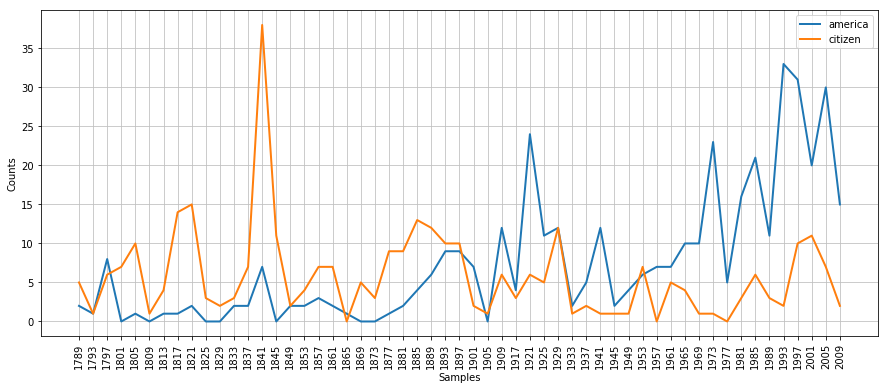

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
cfd.plot();

#### Ejercicio 3. Haz una gráfica que analiza la ocurrencia de las palabras 'democracy', 'war' y 'freedom' en los discursos inagurales de EEUU

In [51]:
cfd2 = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['democracy','war','freedom']
        if w.lower().startswith(target)
)

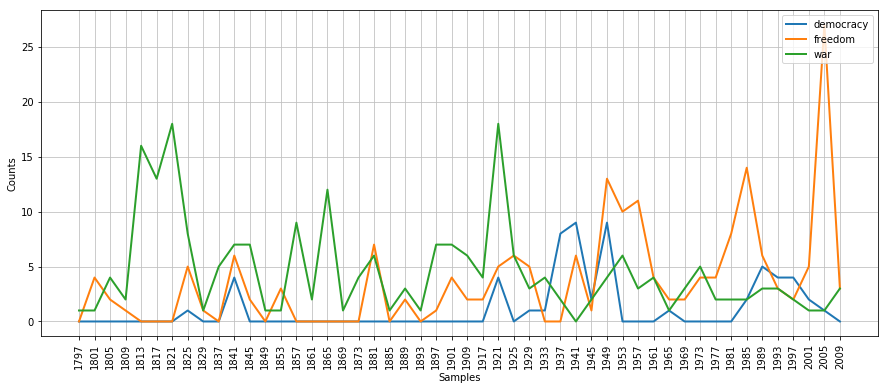

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
cfd2.plot();

#### Ejercicio 4. Haz una gráfica que analiza la ocurrencia de 3 palabras que tu elijas en los discursos inagurales de EEUU

In [55]:
cfd3 = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['black','slavery','racism']
        if w.lower().startswith(target)
)

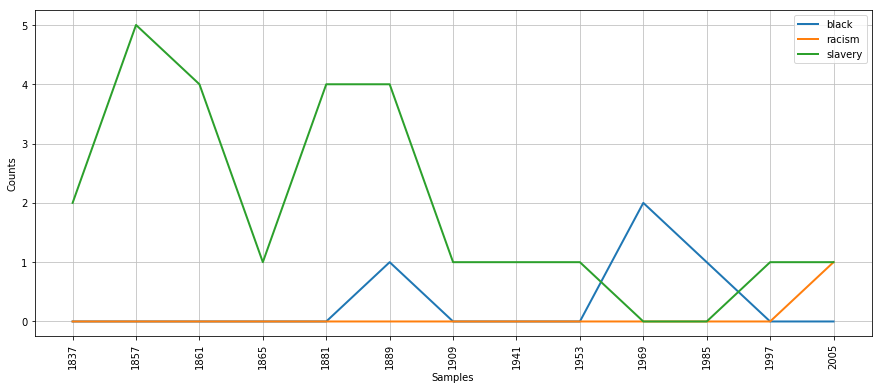

In [56]:
plt.figure(figsize=(15, 6))
cfd3.plot()

In [104]:
cfd6 = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['policy','economy','science']
        if w.lower().startswith(target)
)

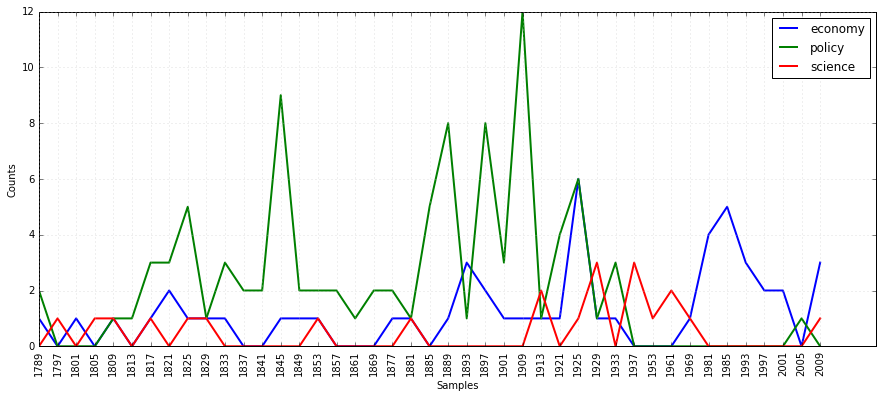

In [105]:
plt.figure(figsize=(15, 6))
cfd6.plot();

Hasta ahora hemos visto ejemplos de los 4 tipos de corpora más comunes

In [109]:
%%html
<img src="corpora-types.png">

## Conditional Frequency Distributions

Una conditional frequency distribution es una colección de frequency distributions cada una difiriendo por una condición

In [110]:
%%html
<p> Veamos un ejemplo </p>
<img src="cfd-condition.png">

### Condiciones y Eventos

Una frequency distribution cuenta eventos observables, tales como la presencia de palabras en un texto. Una conditional frequency distribution requiere una condición para cada evento (deben ir en pares). Ejemplo:

Cada par tiene la forma (condition, event)

In [112]:
from nltk.corpus import brown

In [113]:
cfd = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

Separemos este código en sus partes para ganar claridad sobre lo que estamos haciendo

In [115]:
genre_word = [(genre, word) 
              for genre in ['news','romance']
             for word in brown.words(categories=genre)] 

In [116]:
len(genre_word)

170576

Como podemos ver los primeros pares que se generaron son de la forma ('news',word) y los últimos de la forma ('romance',word)

In [117]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [118]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

Ahora podríamos usar estas condiciones para generar nuestra Conditional Frequency Distribution

In [121]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)

<ConditionalFreqDist with 2 conditions>


Podemos revisar cuáles son nuestras dos condiciones

In [122]:
cfd.conditions()

['news', 'romance']

Ahora verifiquemos que es cierto que una cfd es sólamente un conjunto de Frequency Distributions

In [123]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [125]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [127]:
print(cfd['romance'].most_common(20))

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]


In [128]:
cfd['romance']['could']

193

### Graficando y Tabulando CFD

Veamos un nuevo de ejemplo (en adición al de los speechs inaugurales) 

In [129]:
from nltk.corpus import udhr

In [130]:
languages = ['Chickasaw', 'English', 'German_Deutsch',
     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

In [133]:
cfd = nltk.ConditionalFreqDist(
           (lang, len(word)) 
           for lang in languages
           for word in udhr.words(lang + '-Latin1')
)

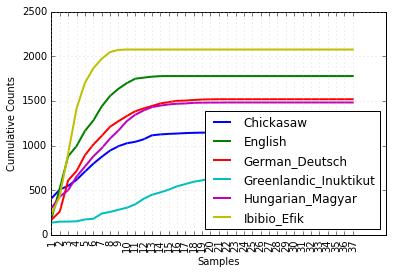

In [135]:
cfd.plot(cumulative=True)

In [137]:
cfd.tabulate(conditions=['English','German_Deutsch'], samples=range(10), cumulative = True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


Este es un uso común de las cfd podemos calcular muchos datos y luego explorarlos utilizando algunas condiciones o samples en forma tabular o de gráfica

Nota: Hasta ahora hemos visto que cuando pasamos una list comprehension como parámetro de una función se nos permite omitir los corchetes (para quien esté interesado en profundizar este tema se llama en Python 'generator expressions')

In [139]:
words = "Este es mi mi mi ejemplo".split(" ")

In [140]:
set([w.lower() for w in words])

{'ejemplo', 'es', 'este', 'mi'}

In [141]:
set(w.lower() for w in words)

{'ejemplo', 'es', 'este', 'mi'}

### Generar texto aleatorio a partir de bigramas

Podemos utilizar una cfd para crear una tabla de bigramas (pares de palabras)

La función bigrams() toma una lista de palabras y crea una lista de palabras consecutivas. Para no obtener un críptico objeto del tipo generator transformamos el output en una lista

In [143]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [144]:
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [146]:
def generate_text(cfdist, word, num=15):
    for i in range(num):
        print(word,end=' ')
        word = cfdist[word].max()

In [164]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [165]:
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [166]:
generate_text(cfd,'living')

living creature that he said , and the land of the land of the land 

#### Ejercicio 5. Prueba la función generate_text con otro par de palabras

In [167]:
generate_text(cfd,'God')

God of the land of the land of the land of the land of the 

In [168]:
generate_text(cfd,'sin')

sin against him , and the land of the land of the land of the 

#### Ejercicio 6. Genera 40 palabras de texto a partir de la cfd correspondiente al inaugural speech de Obama, comienza tu frase con America

In [153]:
from nltk.corpus import inaugural

In [154]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [157]:
text = inaugural.words('2009-Obama.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [160]:
cfd['America']

FreqDist({'!': 1,
          "'": 2,
          '--': 1,
          '.': 2,
          'as': 1,
          'has': 1,
          'is': 1,
          'must': 1})

In [161]:
generate_text(cfd, "America", 40)

America . We will not just as the world , and the world , and the world , and the world , and the world , and the world , and the world , and the world , and the 

## Lexicon o Lexical resources

Un lexicon o lexical resource es una colección de palabras y/o frases normalmente asociadas a la información del texto o como parte del discurso. Los lexical resources son secundarios a un texto y normalmente se crean a partir de uno o varios textos.

In [173]:
%%html
<img src='lexicon.png' height="350" width="600">

### Listas de palabras

Se utilizan por ejemplo para corregir ortografía. 

Por ejemplo, vamos a crear un corrector de ortografía a partir de las palabras de una lista de palabras

In [175]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [176]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [177]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

Existen también un conjunto de palabras conocidas como 'stopwords' que son palabras que se utilizan con mucha frecuencia y que son por tanto malas para ayudarnos a distinguir un texto de otro. ¿Qué palabras se les ocurre que sean comunes como stopwords en español?

In [178]:
from nltk.corpus import stopwords

In [180]:
stopwords.fileids()

['danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'kazakh',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [181]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [224]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

Podemos hacer una función para calcular la fracción de palabras en un texto que no están incluida en la lista de stopwords

In [225]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content)/len(text)

In [226]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

Existe otro corps que es muy útil de conocer que contiene nombres para hombres y mujeres

In [185]:
names = nltk.corpus.names

In [186]:
names.fileids()

['female.txt', 'male.txt']

Podemos hacer una lista de aquellos nombres ambigüos, i.e., que aparecen en ambas listas

In [227]:
male_names = names.words('male.txt')

In [228]:
female_names = names.words('female.txt')

In [229]:
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

Otra cosa que es bien conocida es que tanto en español como el inglés los nombres que terminan con la letra 'a' tienden a ser de mujeres. Utilicemos una cfd para probarlo

In [190]:
cfd = nltk.ConditionalFreqDist(
        (fileid,name[-1])
        for fileid in names.fileids()
        for name in names.words(fileid)
)

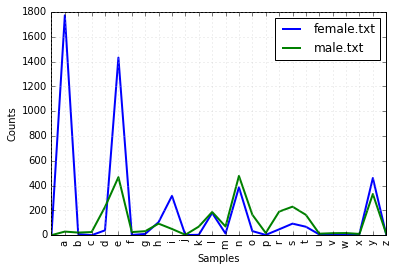

In [191]:
cfd.plot()